In [4]:
using LinearAlgebra, PyPlot
rc("axes.spines", top=false, right=false)
rc("font", family="Arial")

Juliaの組み込み関数で符号関数 `sign()`, tanh関数 `tanh()` は定義されているため，他の関数を定義する．

In [2]:
heaviside(x) = 1.0*(x >= 0) # Heaviside step function (H(0)=1)
sigmoid(x) = 1.0 / (1.0 + exp(-x)) # Sigmoid function
relu(x) = max(0.0, x) # ReLU function
softplus(x) = log1p(exp(x)) # Softplus function
naka_rushton(x; m=10, s=2, a=2.4) = x >= 0 ? m * x^a / (s^a + x^a) : 0.0

naka_rushton (generic function with 1 method)

Softplus関数の実装に用いた `log1p(x)` は、数学的には `log(1 + x)` と同じ値を返すが、$x \approx 0$ のときに数値的誤差が生じにくく、より安定した計算が可能である。また、Naka–Rushton関数の実装では条件演算子（三項演算子）を使用している。条件演算子は `変数 = 条件式 ? 式1 : 式2` の形式で記述され、条件式が `true` の場合は `式1` を、`false` の場合は `式2` を評価し、その結果を変数に代入するものである。なお，Heaviside関数も条件演算子を用いて `heaviside(x) = x >= 0 ? 1.0 : 0.0` と記述することができる．また，Juliaでは `>=` の代わりに `\geq` と入力して TAB を押すことで、`≥` という数学記号を用いることができる。

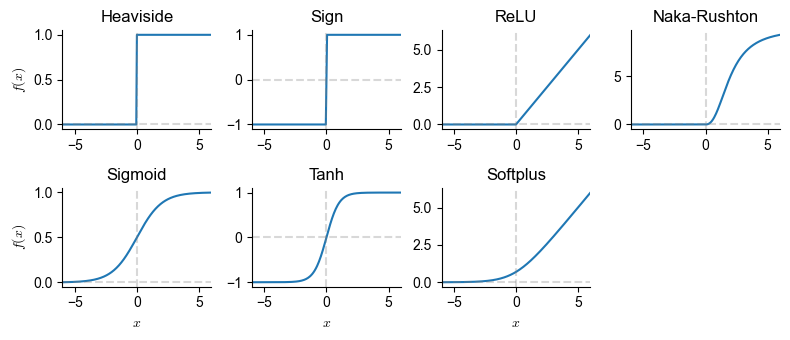

In [6]:
funcs = [heaviside, sigmoid, sign, tanh, relu, softplus, naka_rushton]
func_labels = ["Heaviside", "Sigmoid", "Sign", "Tanh", "ReLU", "Softplus", "Naka-Rushton"]

xs = -6:0.05:6
ys = []
for f in funcs
    push!(ys, f.(xs)) # 各要素ごとに関数を適応させるため，ピリオド (.) を関数の後に置く．
end;

# plot
fig, axes = subplots(2, 4, figsize=(8, 3.5))
axf = axes[:]
axf[end].remove()
for i in 1:length(funcs)
    axf[i].set_title(func_labels[i])
    axf[i].plot(xs, ys[i])
    axf[i].axhline(0, linestyle="dashed", color="tab:gray", alpha=0.3)
    axf[i].axvline(0, linestyle="dashed", color="tab:gray", alpha=0.3)
    axf[i].set_xlim(xs[1], xs[end])
    (i % 2 == 0) && axf[i].set_xlabel(L"$x$", math_fontfamily="cm")
    (i <= 2) && axf[i].set_ylabel(L"$f(x)$", math_fontfamily="cm")
end
tight_layout()

次に、シグモイド関数、tanh関数、ソフトプラス関数に逆温度パラメータを導入し、その値を増加させることで、それぞれがHeaviside関数、符号関数、ReLU関数へと漸近することを数値的に確認しよう。逆温度パラメータを導入する際，Softplusのみ，$x \to \beta x$ とするだけでなく，全体に $1/\beta$ を乗じてスケーリングする必要があることに注意しよう．

In [7]:
n_β = 25 # number of inverse temperatures
βs = logrange(0.5, 100, length=n_β) # logscale range

ys_β = []
for f in [sigmoid, tanh]
    y = [f.(β .* xs) for β in βs]
    push!(ys_β, y)
end
push!(ys_β, [1/β * softplus.(β .* xs) for β in βs]); # only Softplus

# plot 
fig, axes = subplots(1, 3, figsize=(6, 2.5))
axf = axes[:]
cmap = get_cmap("jet_r")
func_labels2 = ["Sigmoid", "Tanh", "Softplus"]
fig.suptitle(L"Activation functions with inverse temperatures $\beta$", math_fontfamily="cm")
axf[1].text(2, 0.6, L"$\beta=$"*"$(βs[1])", color=cmap(0))
    axf[1].text(-5.5, 0.8, L"$\beta=$"*"$(βs[end])", color=cmap((n_β-1)/n_β))
for (i, label) in enumerate(["Sigmoid", "Tanh", "Softplus"])
    axf[i].set_title(label)
    for j in 1:n_β
        map = axf[i].plot(xs, ys_β[i][j], color=cmap((j-1)/n_β))
    end
    axf[i].axhline(0, linestyle="dashed", color="tab:gray", alpha=0.3)
    axf[i].axvline(0, linestyle="dashed", color="tab:gray", alpha=0.3)
    axf[i].set_xlim(xs[1], xs[end])
    axf[i].set_xlabel(L"$x$", math_fontfamily="cm")
    (i == 1) && axf[i].set_ylabel(L"$f(x)$", math_fontfamily="cm")
end
tight_layout()

LoadError: UndefVarError: `logrange` not defined

関数の出力は、逆温度 $\beta$ が小さいほど赤色、$\beta$ が大きいほど青色に近づくように示している。逆温度が大きくなるにつれて関数の遷移は急峻になり、滑らかさが失われていくことから、最終的には微分不可能な関数に漸近していく様子が確認できる。